SUMBER: https://www.kaggle.com/datasets/franoisgeorgesjulien/crypto

In [53]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import os
path = '/content/drive/My Drive/Binance_1INCHUSDT_1h/'
os.listdir(path)

['Binance_1INCHUSDT_1h.csv', 'Binance.ipynb']

In [56]:
import pandas as pd
df = pd.read_csv(path + 'Binance_1INCHUSDT_1h.csv', encoding='utf-8', parse_dates=['Date'])
#df = pd.read_csv('bbc-text.csv', encoding='utf-8')

In [57]:
df['volume'] = df['Volume 1INCH']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          24672 non-null  datetime64[ns]
 1   Symbol        24672 non-null  object        
 2   Open          24672 non-null  float64       
 3   High          24672 non-null  float64       
 4   Low           24672 non-null  float64       
 5   Close         24672 non-null  float64       
 6   Volume 1INCH  24672 non-null  float64       
 7   Volume USDT   24672 non-null  float64       
 8   tradecount    24672 non-null  int64         
 9   volume        24672 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 1.9+ MB


In [58]:
# Urutkan data berdasarkan kolom tanggal
df= df.sort_values(by='Date')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume 1INCH,Volume USDT,tradecount,volume
24671,2020-12-25 05:00:00,1INCHUSDT,0.2000,3.0885,0.2000,2.5826,13125130.77,3.553052e+07,48768,13125130.77
24670,2020-12-25 06:00:00,1INCHUSDT,2.5824,2.6900,2.2249,2.5059,9270672.93,2.244087e+07,31099,9270672.93
24669,2020-12-25 07:00:00,1INCHUSDT,2.5152,2.8870,2.3609,2.6237,7923760.56,2.130043e+07,33001,7923760.56
24668,2020-12-25 08:00:00,1INCHUSDT,2.6318,2.8247,2.4650,2.6134,6625565.00,1.749181e+07,30459,6625565.00
24667,2020-12-25 09:00:00,1INCHUSDT,2.6104,2.7498,2.5629,2.6365,3739132.73,9.919400e+06,21023,3739132.73


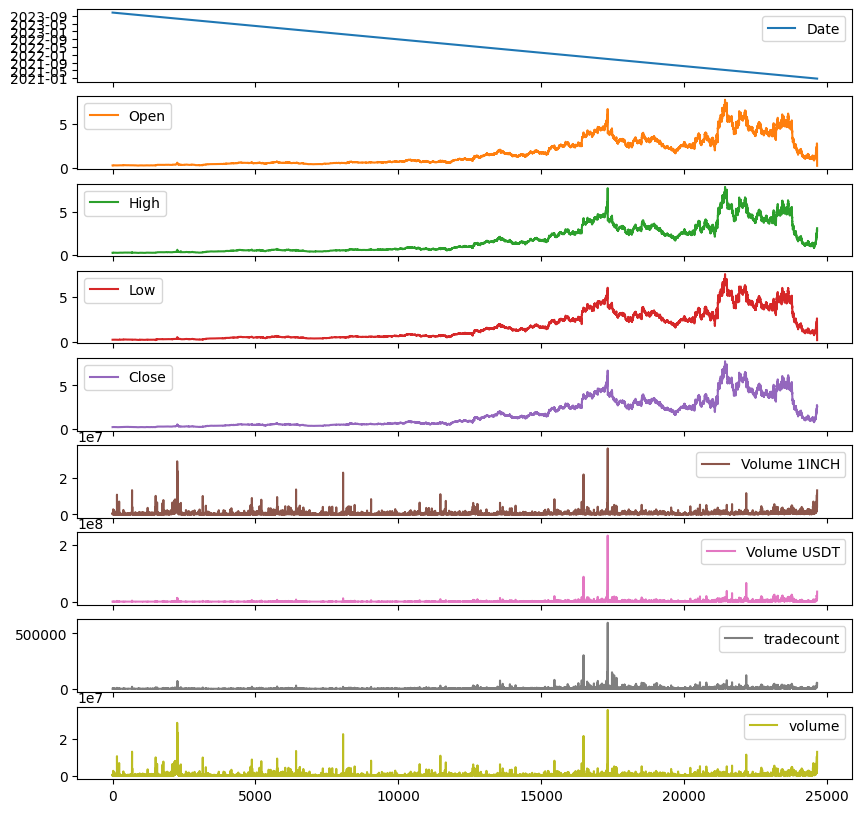

In [59]:
# Show data by picture
df[df['Symbol'] == '1INCHUSDT'].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

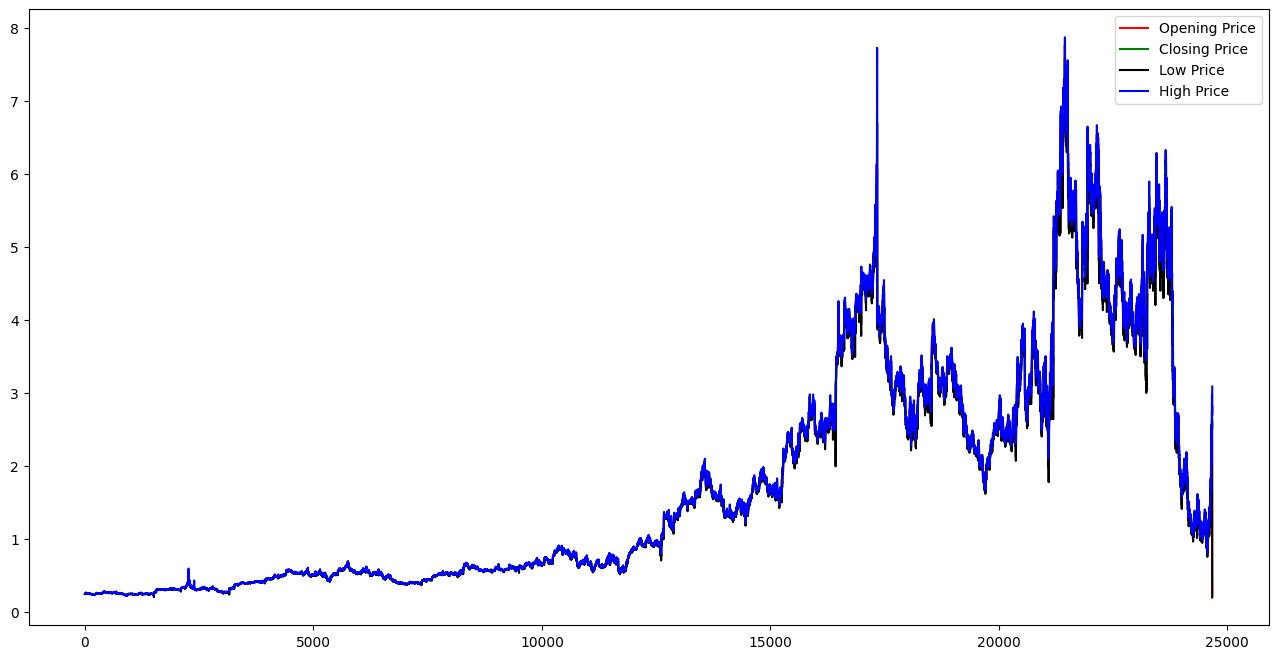

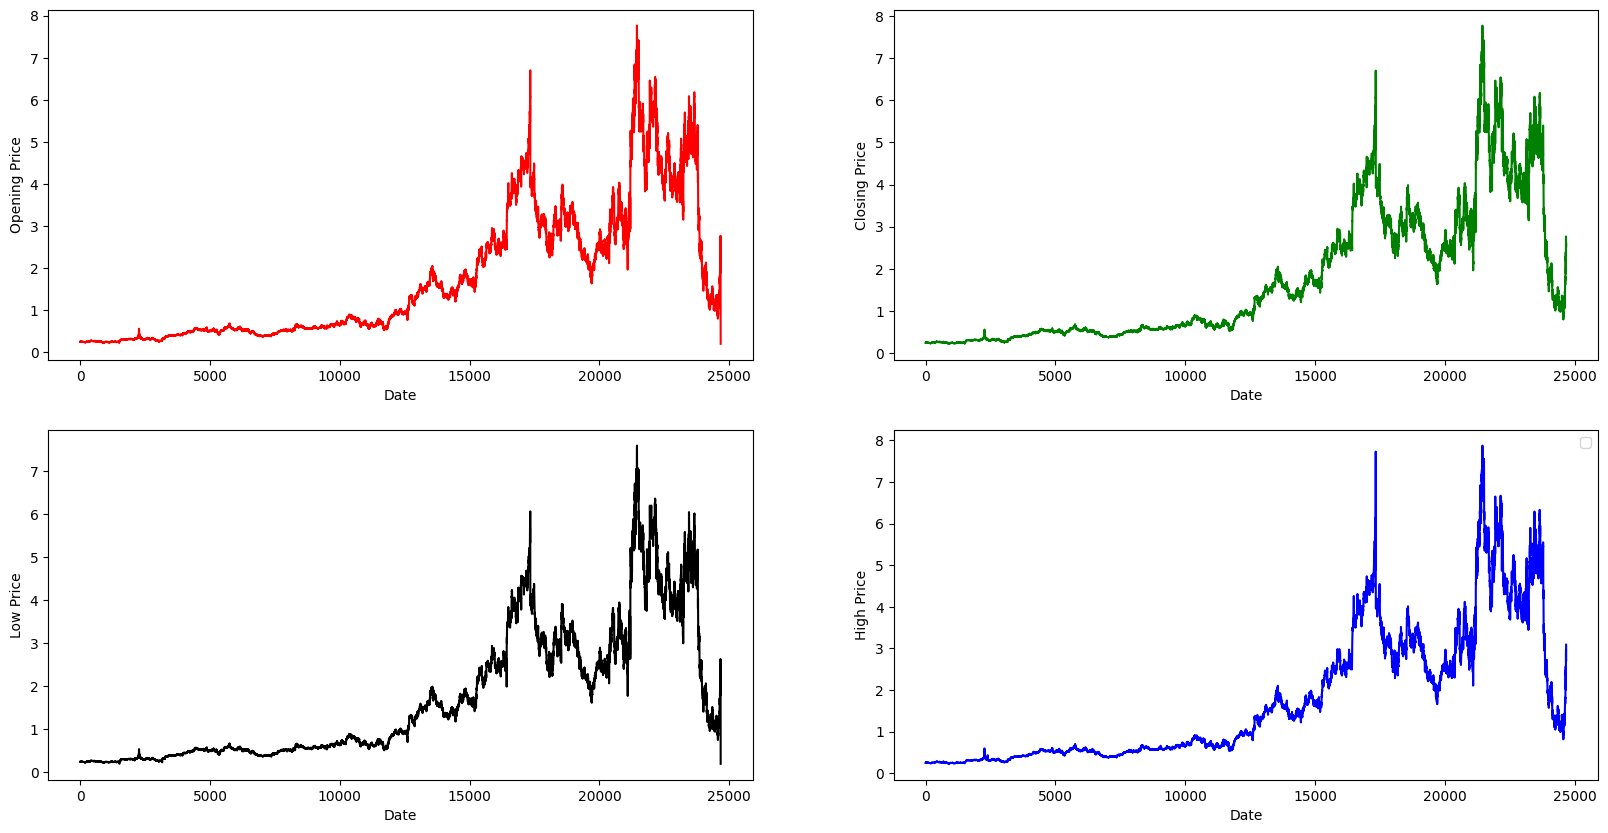

In [60]:
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Open'], color='red', label = 'Opening Price')
plt.plot(df['Close'], color='green', label = 'Closing Price')
plt.plot(df['Low'], color='black', label = 'Low Price')
plt.plot(df['High'], color='blue', label = 'High Price')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (20, 10))

ax1 = plt.subplot(2, 2, 1)
plt.plot(df['Open'], color='red')
plt.xlabel('Date')
plt.ylabel('Opening Price')

ax2 = plt.subplot(2, 2, 2)
plt.plot(df['Close'], color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')

ax3 = plt.subplot(2, 2, 3)
plt.plot(df['Low'], color='black')
plt.xlabel('Date')
plt.ylabel('Low Price')

ax4 = plt.subplot(2, 2, 4)
plt.plot(df['High'], color='blue')
plt.xlabel('Date')
plt.ylabel('High Price')

plt.legend(loc='best')

## Data Preprocessing

In [62]:
#Check for null values and the statistical measurement
print(df.isna().sum())
print(df.describe())

Date            0
Symbol          0
Open            0
High            0
Low             0
Close           0
Volume 1INCH    0
Volume USDT     0
tradecount      0
volume          0
dtype: int64
               Open          High           Low         Close  Volume 1INCH  \
count  24672.000000  24672.000000  24672.000000  24672.000000  2.467200e+04   
mean       1.728424      1.748911      1.706915      1.728408  4.415206e+05   
std        1.575206      1.598287      1.550845      1.575185  8.714524e+05   
min        0.200000      0.223500      0.200000      0.221700  0.000000e+00   
25%        0.513000      0.516000      0.509000      0.513000  1.317910e+05   
50%        0.926000      0.936000      0.917000      0.926000  2.453122e+05   
75%        2.707325      2.742925      2.669050      2.707550  4.684321e+05   
max        7.762900      7.874800      7.593200      7.768400  3.597447e+07   

        Volume USDT     tradecount        volume  
count  2.467200e+04   24672.000000  2.467200

Date, Symbol, Open, High, Low, Close, Volume 1INCH, Volume USTD, tradecount

In [63]:
#Get rid of features that has no relevancy and undescribed features
df = df.drop(['Symbol', 'Volume 1INCH', 'Volume USDT', 'tradecount',], axis=1)

#Normalize the volume features
df.Open= (df.Open-df.Open.min()
                     )/(df.Open.max()-df.Open.min())

In [64]:
#Sorting by dates
dates = pd.to_datetime(df.Date)
df = df.drop('Date', axis=1)
df['Date'] = dates

df = df
df_sorted = df.sort_values(by='Date')
df_sorted = df.reset_index()

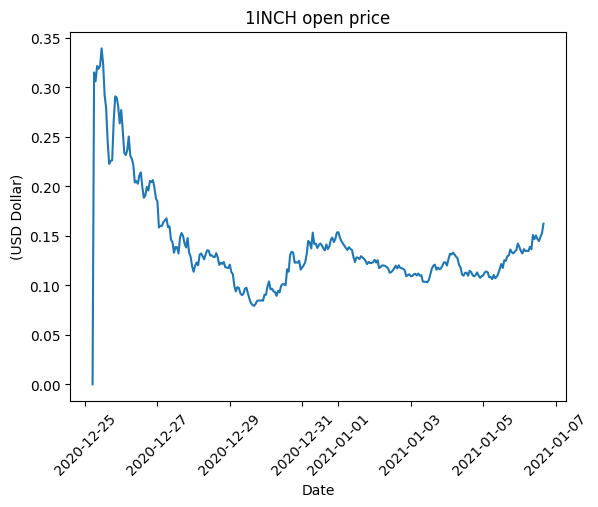

In [65]:
%matplotlib inline

#Plot 1INCH price
dates = df_sorted.Date
target_open_price = df_sorted.Open.values

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(dates[:300], target_open_price[:300])
ax.set(xlabel="Date",
       ylabel="(USD Dollar)",
       title="1INCH open price")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

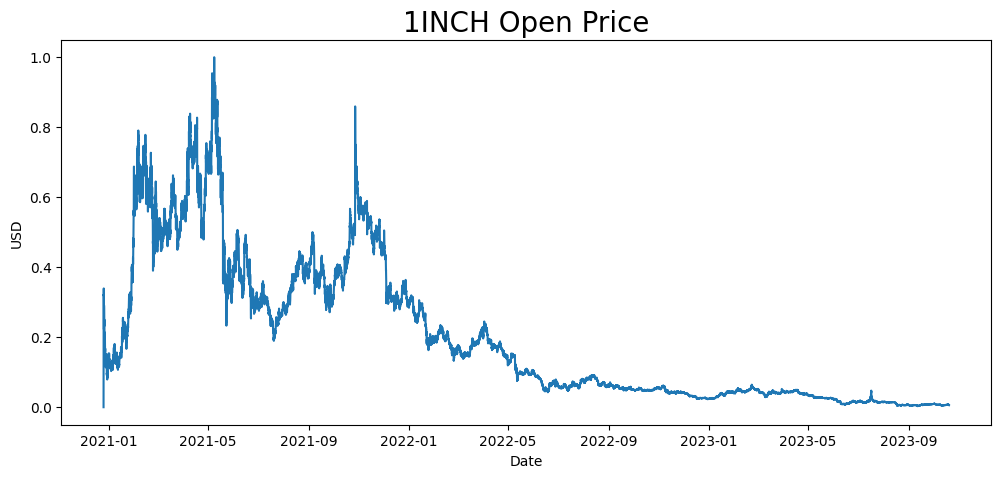

In [66]:
import matplotlib.pyplot as plt

time = df['Date'].values
open = df['Open'].values

plt.figure(figsize=(12, 5))
plt.plot(time, open)
plt.title('1INCH Open Price', fontsize=20)
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

Data Slicing and Splitting

In [67]:
#Split timeframe data for train and val data
from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 300)
X_train, X_val, y_train, y_val = train_test_split(time, open, test_size=0.2, shuffle=False)

In [68]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(19737,) (4935,)
(19737,) (4935,)


Build Tensorflow Model

In [69]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))

    return ds.batch(batch_size).prefetch(1)

In [70]:
train_set = windowed_dataset(y_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set   = windowed_dataset(y_val,  window_size=60, batch_size=100, shuffle_buffer=1000)

In [71]:
maeScale = (open.max() - open.min()) * 10/100
print(maeScale)

0.1


In [72]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')< maeScale and logs.get('val_mae') < maeScale):
            print("\nMAE dan Val MAE telah mencapai nilai < 10% dari data. Training dihentikan.")
            self.model.stop_training = True
callbacks = myCallback()

untuk arsitektur model gunakan 2 buah layer LSTM. Ketika menggunakan 2 buah layer LSTM, perhatikan bahwa layer pertama harus memiliki parameter return_sequences yang bernilai True.

In [73]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
    ])

In [74]:
# Menggunakan TimeDistributed untuk memproses setiap waktu dalam sekuen
# model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))

In [75]:
# Kompilasi model
optimizer = tf.keras.optimizers.SGD(learning_rate=1.00e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [79]:
epoch = 100

In [80]:
history = model.fit(train_set, epochs=epoch, verbose=2, validation_data=val_set, callbacks=[callbacks])

Epoch 1/100
197/197 - 35s - loss: 0.0181 - mae: 0.1598 - val_loss: 0.0151 - val_mae: 0.1732 - 35s/epoch - 176ms/step
Epoch 2/100
197/197 - 32s - loss: 0.0177 - mae: 0.1573 - val_loss: 0.0142 - val_mae: 0.1682 - 32s/epoch - 161ms/step
Epoch 3/100
197/197 - 32s - loss: 0.0171 - mae: 0.1543 - val_loss: 0.0136 - val_mae: 0.1643 - 32s/epoch - 162ms/step
Epoch 4/100
197/197 - 30s - loss: 0.0165 - mae: 0.1515 - val_loss: 0.0131 - val_mae: 0.1612 - 30s/epoch - 154ms/step
Epoch 5/100
197/197 - 31s - loss: 0.0159 - mae: 0.1488 - val_loss: 0.0126 - val_mae: 0.1583 - 31s/epoch - 159ms/step
Epoch 6/100
197/197 - 31s - loss: 0.0154 - mae: 0.1461 - val_loss: 0.0121 - val_mae: 0.1552 - 31s/epoch - 159ms/step
Epoch 7/100
197/197 - 31s - loss: 0.0148 - mae: 0.1435 - val_loss: 0.0116 - val_mae: 0.1521 - 31s/epoch - 159ms/step
Epoch 8/100
197/197 - 32s - loss: 0.0143 - mae: 0.1410 - val_loss: 0.0112 - val_mae: 0.1490 - 32s/epoch - 162ms/step
Epoch 9/100
197/197 - 30s - loss: 0.0138 - mae: 0.1383 - val_los

In [81]:
mae_train = history.history['mae']
mae_val = history.history['val_mae']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = np.arange(1, len(mae_train) + 1)
#epoch = np.arange(46)

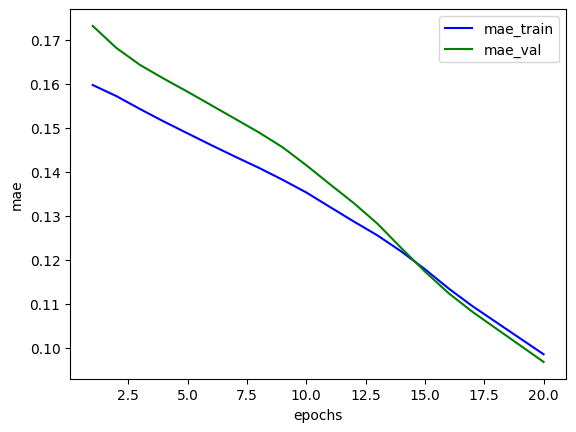

In [82]:
plt.plot(epoch, mae_train, 'b')
plt.plot(epoch, mae_val, 'g')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend(['mae_train', 'mae_val'])

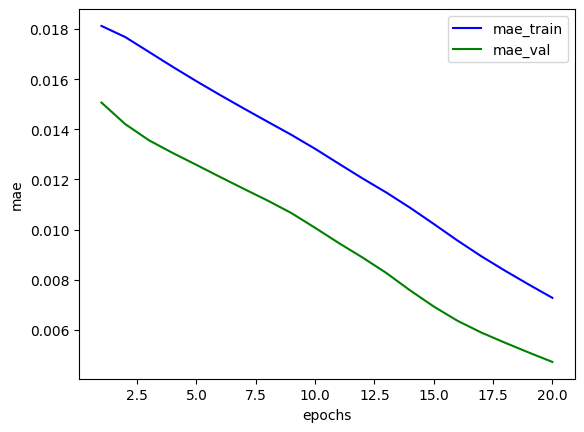

In [83]:
plt.plot(epoch, train_loss, 'b')
plt.plot(epoch, val_loss, 'g')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend(['mae_train', 'mae_val'])

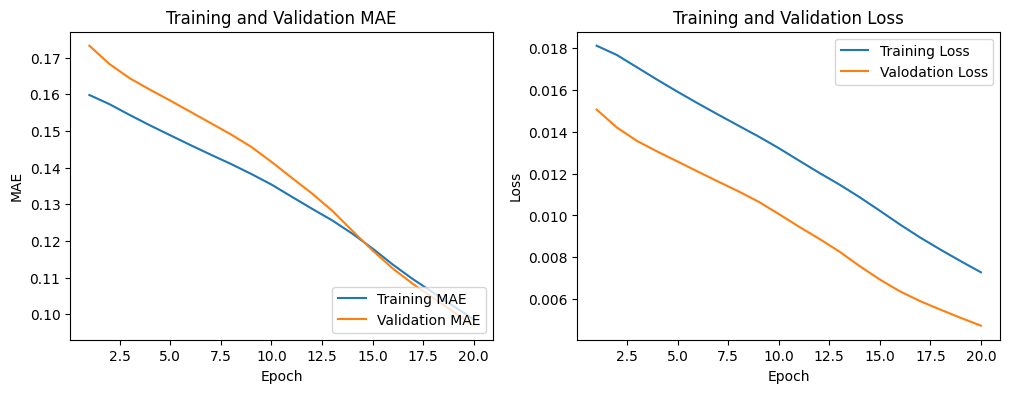

In [84]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch, mae_train,     label='Training MAE')
plt.plot(epoch, mae_val, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epoch, train_loss,     label='Training Loss')
plt.plot(epoch, val_loss, label='Valodation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()